In [ ]:
pwd

'/content'

### Todo
- Dataset img
- Saved model

### Setup

In [ ]:
import os
import pathlib

In [ ]:
# Get current directory
dataset_path = os.getcwd()
dataset_path

'/content'

Clone Tensorflow Object Detection API github

In [ ]:
if "models" in pathlib.Path.cwd().parts:
    while "models" in pathlib.Path.cwd().parts:
        os.chdir('..')
elif not pathlib.Path('models').exists():
    !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2185, done.
remote: Counting objects: 100% (2185/2185), done.
remote: Compressing objects: 100% (1891/1891), done.
remote: Total 2185 (delta 524), reused 938 (delta 269), pack-reused 0
Receiving objects: 100% (2185/2185), 30.41 MiB | 23.38 MiB/s, done.
Resolving deltas: 100% (524/524), done.


Install the Object Detection API

In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1577697 sha256=899ae33d6eb581babc19012a7087e1e8a4aa06db85eaafb5644ddf28798af970
  Stored in directory: /tmp/pip-ephem-wheel-cache-7qymx6ce/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.0-cp36-none-any.whl size=43735 sha256=893f0d03b203e2dbd43cd85139a690d9b051e2c8c0750da0e87d3d93fff79a51
  Stored in directory: /root/.cache/pip/wheels/3f/15/cd/fe4ec8b88c130393464703ee8111e2cddebdc40e1b59ea85e9
  Created wheel for oauth2client: filename=oauth2client-3.0.0-cp36-none-any.whl size=106382 sha256=c4a865e0f337fa7aab5d59f9edec6787b574d5b62d62ac7814b55ce2590cfd3c
  Stored in directory: /root/.cache/pip/wheels/48/f7/87/b932f09c6335dbcf45d916937105a372ab14f353a9ca431d7d
  Created wheel for hdfs: filename=hdfs-2.5.8-cp36-none-any.whl size=33213 sha256=a46a1b67da8cbe415e30923dfcf3a1a1d301bf8cf3b

ERROR: pydrive 1.3.1 has requirement oauth2client>=4.0.0, but you'll have oauth2client 3.0.0 which is incompatible.
ERROR: multiprocess 0.70.10 has requirement dill>=0.3.2, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.24.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.24.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1; python_version >= "3.0", but you'll have avro-python3 1.10.0 which is incompatible.


Clone project github

In [ ]:
if "fashion-visual-search" in pathlib.Path.cwd().parts:
    while "fashion-visual-search" in pathlib.Path.cwd().parts:
        os.chdir('..')
elif not pathlib.Path('fashion-visual-search').exists():
    !git clone https://github.com/TanThinNguyen/fashion-visual-search.git

Cloning into 'fashion-visual-search'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 1), reused 18 (delta 1), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [ ]:
# %%bash
# cd models/research/
# protoc object_detection/protos/*.proto --python_out=.

In [ ]:
# %%bash 
# cd models/research
# python -m pip install .

Import packages

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import pathlib
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [ ]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

### Detection Preparation

Download saved detection model

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1K2Gt346QIyrOEkzwAM0rQBCj1Fa3Lf-p"

--2020-09-21 15:42:47--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTR7EtP27gljpJg91k2DVoRgkB84hkMl78bOA&usqp=CAU
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.195.139, 74.125.195.101, 74.125.195.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.195.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3335 (3.3K) [image/png]
Saving to: ‘images?q=tbn:ANd9GcTR7EtP27gljpJg91k2DVoRgkB84hkMl78bOA&usqp=CAU’

images?q=tbn:ANd9Gc 100%[===================>]   3.26K  --.-KB/s    in 0s      

2020-09-21 15:42:47 (61.0 MB/s) - ‘images?q=tbn:ANd9GcTR7EtP27gljpJg91k2DVoRgkB84hkMl78bOA&usqp=CAU’ saved [3335/3335]



Labels map

In [ ]:
# Label Map
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'fashion-visual-search/data/deepfashion_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

Load detection model

In [ ]:
model_name = 'faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8'
detection_model = tf.saved_model.load("inference_graph/saved_model/")

Define detection score threshold for fashion detection

In [ ]:
score_threshold = 0.9

Add a wrapper function to call the model, and cleanup the outputs:

In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

Run it on each image and show the results:

In [ ]:
def show_inference(model, image_path):
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = np.array(Image.open(image_path))
    # Actual detection.
    output_dict = run_inference_for_single_image(model, image_np)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks_reframed', None),
        use_normalized_coordinates=True,
        line_thickness=4,
        min_score_thresh=score_threshold)

    #display(Image.fromarray(image_np))
    return image_np, output_dict

In [ ]:
def plot_image_list(image_list, nrows=1, ncols=1,figsize=(14, 14)):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for index,title in enumerate(image_list):
        axeslist.ravel()[index].imshow(image_list[index])
        axeslist.ravel()[index].set_axis_off()
    plt.tight_layout()

### Search Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import cv2
import os
import time
from google.colab import files
from keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D

In [ ]:
df_sample = pd.read_csv("fashion-visual-search/data/sample9600.csv")
df_embs = pd.read_csv("fashion-visual-search/data/img_embeddings9600.csv")

# df_sample = pd.read_csv("data/sample6000.csv")
# df_embs = pd.read_csv("data/img_embeddings6000.csv")

# df_sample = pd.read_csv("data/sample4500.csv")
# df_embs = pd.read_csv("data/img_embeddings4500.csv")

In [ ]:
# Input Shape
img_width, img_height, channel = (140, 200, 3)

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Thêm Layer Embedding
search_model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

search_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Các hàm giúp cho việc hiển thị danh sách ảnh mẫu
# figures là dictionary dạng <title: matrix>
def plot_figures(figures, nrows = 1, ncols=1,figsize=(10, 10)):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for index,title in enumerate(figures):
        axeslist.ravel()[index].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[index].set_title(title)
        axeslist.ravel()[index].set_axis_off()
    plt.tight_layout()
    
def img_path(img):
    return os.path.join(dataset_path, img)

def load_image(img):
    return cv2.imread(img_path(img), 1)

In [ ]:
num_classes = 2

# index_dict là dictionary lưu (mapping) các index của các sản phẩm tương ứng với từng class
# key là id của class
# value là các index của sản phẩm
index_dict = {}
for i in range(num_classes):
    index_dict[str(i+1)] = df_sample[df_sample.category_type==(i+1)].index

index_dict

{'1': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759],
            dtype='int64', length=5760),
 '2': Int64Index([5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769,
             ...
             9590, 9591, 9592, 9593, 9594, 9595, 9596, 9597, 9598, 9599],
            dtype='int64', length=3840)}

In [ ]:
def get_embedding_test(model, upload_path, x1, y1, x2, y2):
    img = plt.imread(upload_path)  # RBG color
    x   = img[y1:y2+1, x1:x2+1,:]
    x   = cv2.resize(x,(img_width, img_height))
    x   = np.expand_dims(x, axis=0)
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

# def get_cosine_sim_test(test_emb):
#     test_emb = np.expand_dims(test_emb, axis=0)
#     test_cosine_sim = cosine_similarity(test_emb, df_embs.values)
#     test_cosine_sim = test_cosine_sim.reshape(-1)
#     return test_cosine_sim

def get_recommender_test(test_emb, top_n, detect_class):
    # tạo test_cosine_sim
    test_emb = np.expand_dims(test_emb, axis=0)
    class_index = index_dict[str(detect_class)] # index của sản phẩm tương ứng với class (1, 2 ...)
    # tính khoảng cách giữa test_emb với các embs (cùng class) có trong df_embs
    cosine_sim = cosine_similarity(test_emb, df_embs.loc[class_index].values)
    cosine_sim = cosine_sim.reshape(-1)

    sim_scores = [(class_index[i], x) for i, x in enumerate(cosine_sim)]
    # xếp giảm dần (reverse=True) theo x[1] tức là theo cosine_sim
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0: top_n]
    idx_rec = [i[0] for i in sim_scores]
    idx_sim = [i[1] for i in sim_scores]

    return idx_rec, idx_sim

### Detect on test images

In [ ]:
image_np_list = []
output_dict_list = []

for image_path in TEST_IMAGE_PATHS:
    image_np, output_dict = show_inference(detection_model, image_path)
    image_np_list.append(image_np)
    output_dict_list.append(output_dict)

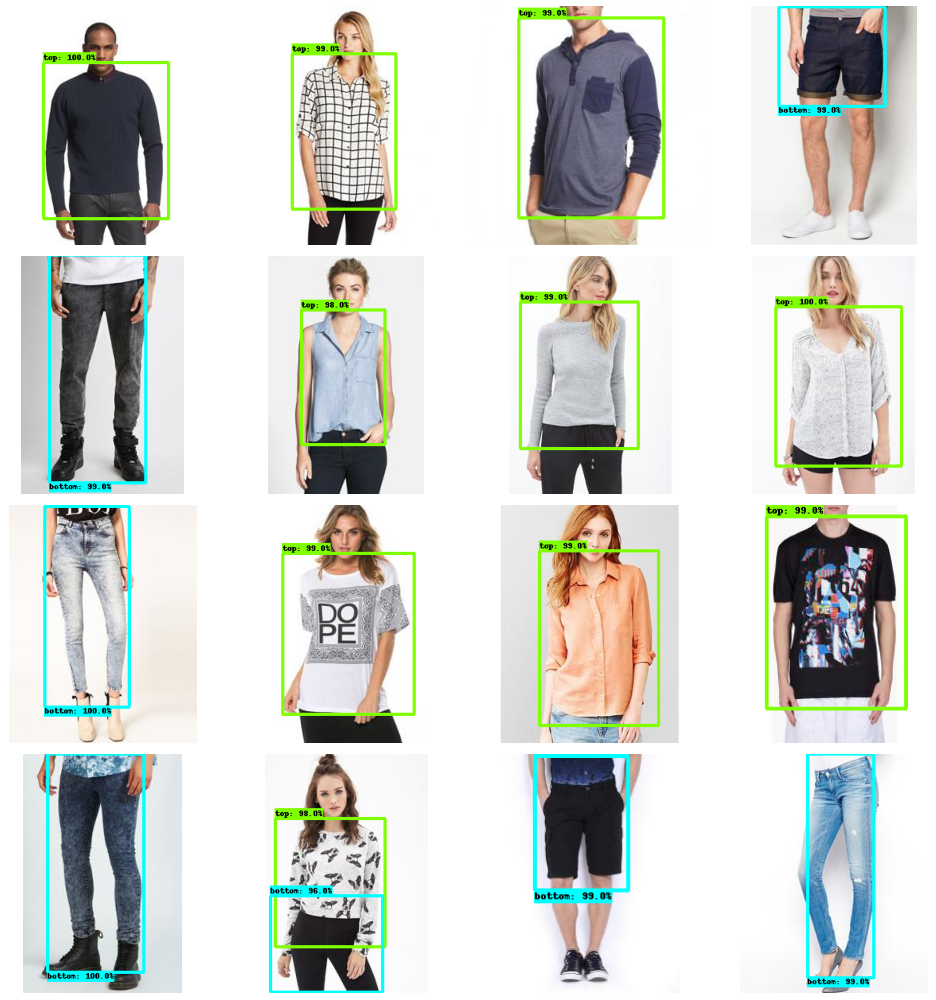

In [ ]:
%matplotlib inline
plot_image_list(image_np_list, nrows=int(np.ceil(len(image_np_list)/4)), ncols=4)

### Detect on upload image

Saving img_00000017.jpg to img_00000017.jpg
Upload size: (300, 196, 3)


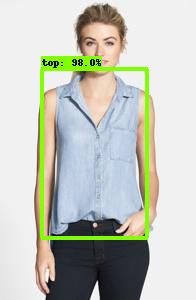

In [ ]:
from google.colab import files
upload_path = dataset_path
uploaded = files.upload()

for fn in uploaded.keys():
    upload_path = os.path.join(upload_path, fn)
    test_img = plt.imread(upload_path)

print("Upload size:", test_img.shape)
# detect sản phẩm trong ảnh
image_np, output_dict = show_inference(detection_model, upload_path)
# hiển thị ảnh kèm bounding box
display(Image.fromarray(image_np))

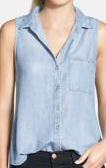

In [ ]:
detection_scores = output_dict["detection_scores"]
detection_boxes = output_dict["detection_boxes"]
detection_classes = output_dict["detection_classes"]

x1 = int(test_img.shape[1] * detection_boxes[0, 1])
y1 = int(test_img.shape[0] * detection_boxes[0, 0])
x2 = int(test_img.shape[1] * detection_boxes[0, 3])
y2 = int(test_img.shape[0] * detection_boxes[0, 2])
cropped = test_img[y1:y2, x1:x2, :]
display(Image.fromarray(cropped))

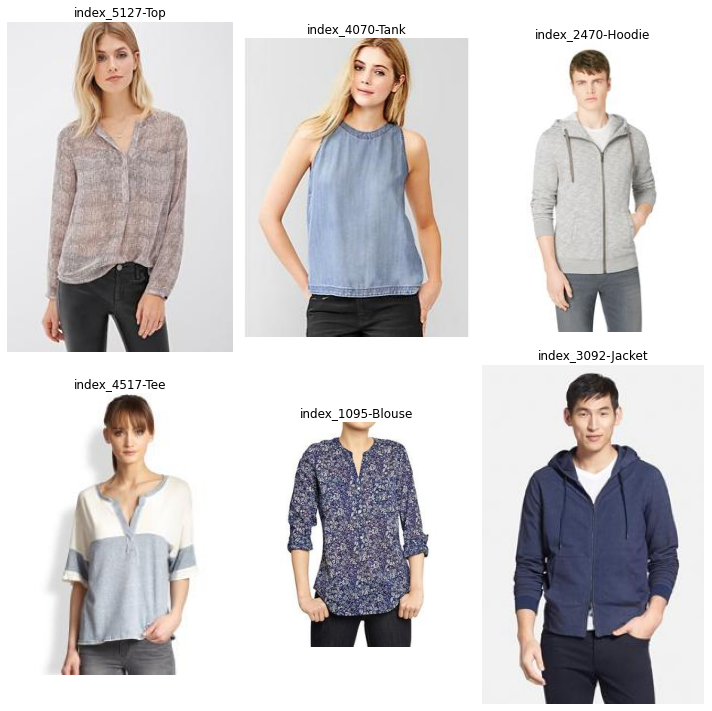

In [ ]:
%matplotlib inline
for i in range(len(detection_scores)):
    if detection_scores[i] >= score_threshold:
        x1 = int(test_img.shape[1] * detection_boxes[i, 1])
        y1 = int(test_img.shape[0] * detection_boxes[i, 0])
        x2 = int(test_img.shape[1] * detection_boxes[i, 3])
        y2 = int(test_img.shape[0] * detection_boxes[i, 2])
        # get embedding
        test_emb = get_embedding_test(search_model, upload_path, x1, y1, x2, y2)
        # lấy danh sách sản phẩm dc recommend
        idx_rec, idx_sim = get_recommender_test(test_emb=test_emb, top_n=6, detect_class=detection_classes[i])
        
        # hiển thị các sản phẩm recommend
        figures = {'index_'+str(i)+"-"+str(row.category_name): load_image(row.image_name) for i, row in df_sample.loc[idx_rec].iterrows()}
        plot_figures(figures, 2, 3)

In [ ]:
idx_sim

[0.7950813739265473,
 0.7875073070130287,
 0.787272084323141,
 0.7839166376839306,
 0.7833546324670896,
 0.7779197221747118]

In [ ]:
output_dict

{'detection_anchor_indices': array([  3., 148., 140.,  34., 113., 105.,  92.,  56., 142.,  61.,  50.,
         77.,  78., 122., 140.,  31.,  95., 101.,   8.,  77., 177., 180.,
        151.,  68., 145.,   8., 173.,  98., 180., 177., 179., 189.,  12.,
        141., 165.,  50., 164., 120., 187., 167., 161.,  89., 163., 155.,
        174.,  12.,  40., 188., 100., 127., 146., 167.,  46.,  17., 172.,
        173., 120.,  17., 136.,  45., 188.,  43., 163.,  83., 138., 171.,
        187., 138.,  98.,  40., 144., 162.,  83., 136., 178., 160.,  28.,
         43., 169., 127., 169., 184.,  28., 184., 162., 144., 178.],
       dtype=float32),
 'detection_boxes': array([[2.30229795e-01, 2.11906746e-01, 7.90721655e-01, 7.54064143e-01],
        [6.29265010e-01, 4.47716527e-02, 9.94480312e-01, 8.68024588e-01],
        [6.93951964e-01, 1.95425913e-01, 9.87137735e-01, 7.74795532e-01],
        [1.97087526e-01, 1.36983484e-01, 9.02613521e-01, 8.67954075e-01],
        [2.70972639e-01, 3.50858569e-01, 7.4806